# 01 - An√°lise Explorat√≥ria de Dados (EDA)

In [4]:
# Importando as bibliotecas necess√°rias:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Carregando o dataset:

df = pd.read_csv("dados_concreto.csv")

In [6]:
# Visualizando as primeiras linhas do dataset:

df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate    Age  Concrete compressive strength  \
0            1040.0           676.0   28.0                          79.99   
1            1055.0           676.0   28.0                          61.89   
2             932.0           594.0  270.0                          40.27   
3             932.0           594.0  365.0                          41.05   
4             978.4           825.5  360.0                          44.30   

  Strength Category  
0              Alto  
1              Alto  
2             Baixa  
3             Baixa  
4             Baixa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [8]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  2029.000000         2029.000000  2029.000000  2029.000000   
mean    415.147610          107.776688    78.604091   264.240315   
std     237.133806          145.230234   106.149019   111.056771   
min     102.000000            0.000000     0.000000   121.800000   
25%     250.000000            0.000000     0.000000   182.000000   
50%     350.400000           26.000000     0.000000   206.000000   
75%     512.400000          187.000000   136.200000   345.800000   
max    1487.600000          923.700000   500.900000   639.900000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       2029.000000       2029.000000     2029.000000  2029.000000   
mean           9.045293       1444.538492     1139.313258    67.255643   
std           10.239884        604.194394      481.913282   103.260526   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        967.100000      776.400000    14.000000   
50%            7.800000       1104.000000      889.000000    28.000000   
75%           13.600000       1911.800000     1502.800000    75.600000   
max           83.700000       3150.000000     2779.300000  1022.000000   

       Concrete compressive strength  
count                    2020.000000  
mean                       35.886683  
std                        16.860121  
min                         2.100000  
25%                        23.500000  
50%                        34.675000  
75%                        46.230000  
max                        87.200000

In [9]:
# Verificando as colunas do dataset:

df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength', 'Strength Category'],
      dtype='object')

In [10]:
# Criando Matriz de Correla√ß√£o entre colunas:
# Selecionando apenas colunas num√©ricas:

df_numerico = df.select_dtypes(include=['float64', 'int64'])

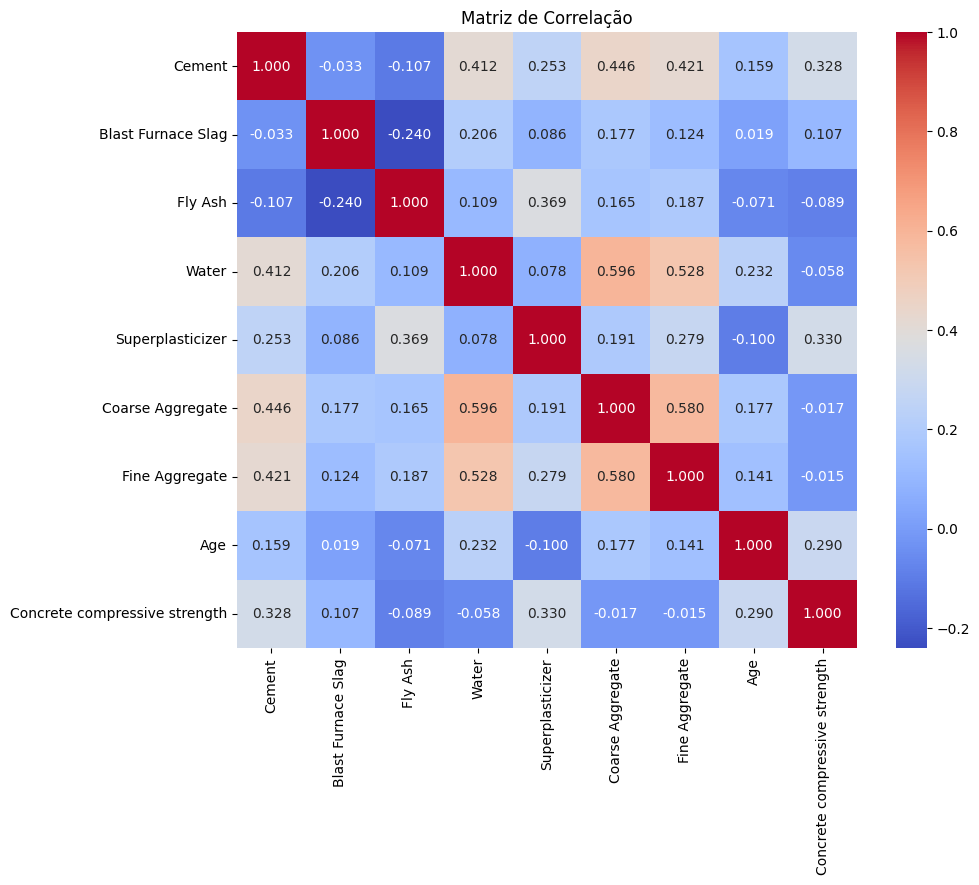

In [11]:
# Plotando gr√°fico de Matriz de correla√ß√£o:

plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Matriz de Correla√ß√£o")
plt.show()

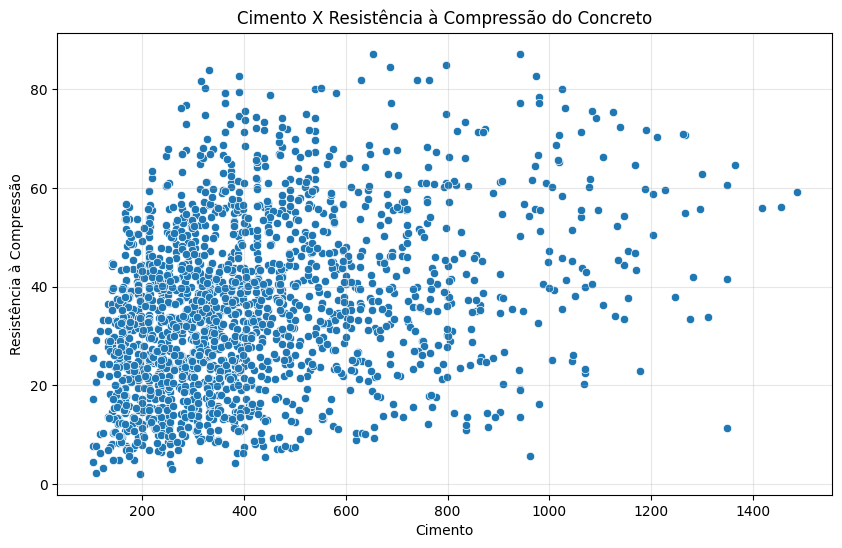

In [12]:
# Plotando gr√°fico de dispers√£o entre "Cement" e "Concrete compressive strength":

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cement', y='Concrete compressive strength')
plt.title('Cimento X Resist√™ncia √† Compress√£o do Concreto')
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.xlabel('Cimento')
plt.ylabel('Resist√™ncia √† Compress√£o')
plt.grid(True)
plt.show()

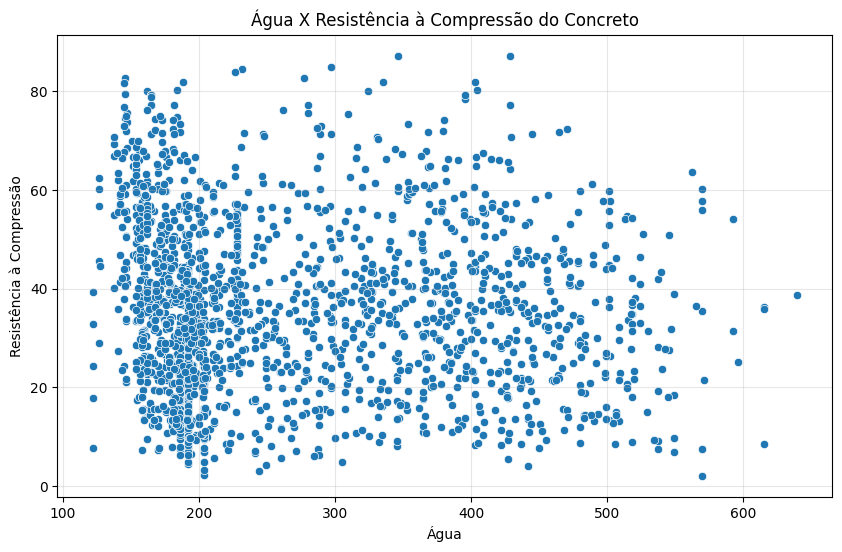

In [13]:
# Plotando gr√°fico de dispers√£o entre "Water" e "Concrete compressive strength":

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Water', y='Concrete compressive strength')
plt.title('√Ågua X Resist√™ncia √† Compress√£o do Concreto')
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.xlabel('√Ågua')
plt.ylabel('Resist√™ncia √† Compress√£o')
plt.grid(True)
plt.show()

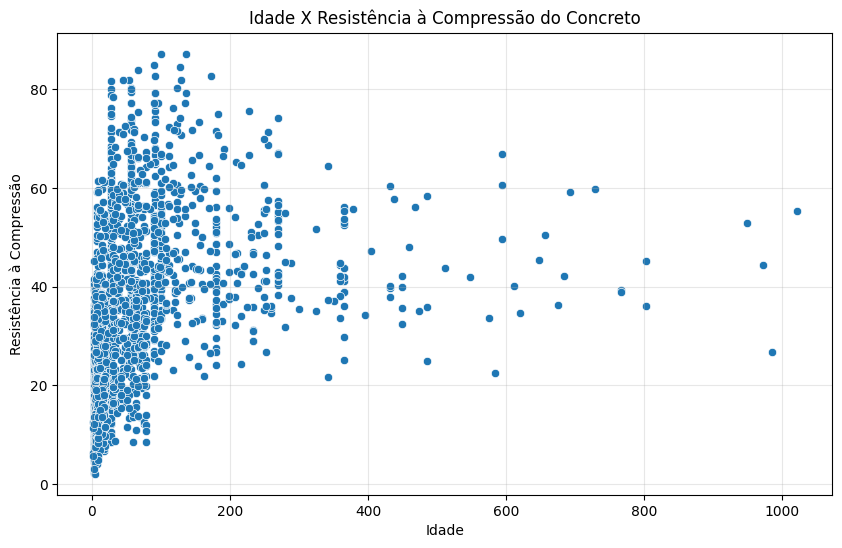

In [14]:
# Plotando gr√°fico de dispers√£o entre "Age" e "Concrete compressive strength":

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Concrete compressive strength')
plt.title('Idade X Resist√™ncia √† Compress√£o do Concreto')
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.xlabel('Idade')
plt.ylabel('Resist√™ncia √† Compress√£o')
plt.grid(True)
plt.show()

In [15]:
# Calculando a resist√™ncia m√©dia por "Strength Category" (Alta, M√©dia, Baixa):

resistencia_media = df.groupby('Strength Category')['Concrete compressive strength'].mean().sort_values()
print(resistencia_media)

Strength Category
Baixa    32.488236
Alto     68.810265
Name: Concrete compressive strength, dtype: float64


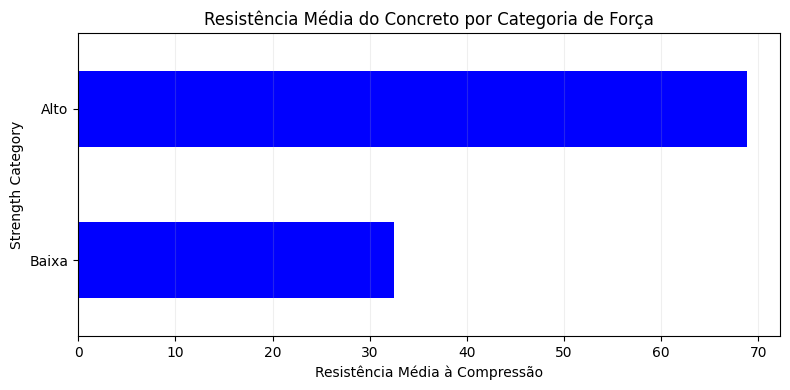

In [16]:
# Plotando gr√°fico de barras horizontais:

plt.figure(figsize=(8, 4))
resistencia_media.plot(kind='barh', color='blue')
plt.xlabel('Resist√™ncia M√©dia √† Compress√£o')
plt.title('Resist√™ncia M√©dia do Concreto por Categoria de For√ßa')
plt.grid(axis='x', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

# 02 - Tratamento de Dados

In [17]:
# Informa√ß√µes gerais:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [18]:
# Verificando a presen√ßa de valores nulos:

print(df.isnull().sum())

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    9
Strength Category                0
dtype: int64


In [19]:
# Removendo os dados nulos:

df = df.dropna(subset=['Concrete compressive strength'])

In [20]:
# Verificando novamente a presen√ßa de valores nulos:

print(df.isnull().sum())

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
Strength Category                0
dtype: int64


In [21]:
# Aplicando One-Hot Encoding na coluna "Strength Category":

df_encoded = pd.get_dummies(df, columns=['Strength Category'], prefix=['Strength Category'],drop_first=True , dtype= int)

df_encoded.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate    Age  Concrete compressive strength  \
0            1040.0           676.0   28.0                          79.99   
1            1055.0           676.0   28.0                          61.89   
2             932.0           594.0  270.0                          40.27   
3             932.0           594.0  365.0                          41.05   
4             978.4           825.5  360.0                          44.30   

   Strength Category_Baixa  
0                        0  
1                        0  
2                        1  
3                        1  
4                        1

In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2020 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2020 non-null   float64
 1   Blast Furnace Slag             2020 non-null   float64
 2   Fly Ash                        2020 non-null   float64
 3   Water                          2020 non-null   float64
 4   Superplasticizer               2020 non-null   float64
 5   Coarse Aggregate               2020 non-null   float64
 6   Fine Aggregate                 2020 non-null   float64
 7   Age                            2020 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category_Baixa        2020 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 173.6 KB


# 03 - Constru√ß√£o e Avalia√ß√£o de Modelos de Regress√£o

In [23]:
# Importando bibliotecas necess√°rias para este m√≥dulo:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [24]:
# Definindo X e y:

# y: vari√°vel alvo
y = df_encoded['Concrete compressive strength']

# X: demais vari√°veis
X = df_encoded.drop(['Concrete compressive strength'], axis=1)

In [25]:
# Dividindo os dados entre treino e teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Normalizando os dados para Regress√£o Linear:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modelo 1 - Random Forest Regressor

In [27]:
# Treinando o modelo:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Realizando as previs√µes:

y_pred_rf = rf_model.predict(X_test)

In [29]:
# Avalia√ß√£o do modelo:

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [30]:
# Exibindo os resultados para Random Forest Regressor:

print(f"Random Forest Regressor:")
print(f"MAE: {mae_rf:.2f}")
print(f"R¬≤: {r2_rf:.2f}")

Random Forest Regressor:
MAE: 5.01
R¬≤: 0.82


Modelo 2 - Regress√£o Linear

In [31]:
# Treinando o modelo:

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Realizando as previs√µes:

y_pred_lr = lr_model.predict(X_test_scaled)

In [33]:
# Avalia√ß√£o do modelo:

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [34]:
# Exibindo os resultados para Random Forest Regressor:

print(f"Linear Regression:")
print(f"MAE: {mae_lr:.2f}")
print(f"R¬≤: {r2_lr:.2f}")

Linear Regression:
MAE: 9.34
R¬≤: 0.52


In [35]:
# Comparativo dos Modelos:

print("Comparativo de Modelos:")
print(f"{'M√©trica':<10} | {'Random Forest':<15} | {'Linear Regression'}")
print(f"{'-'*48}")
print(f"{'MAE':<10} | {mae_rf:<15.2f} | {mae_lr:.2f}")
print(f"{'R¬≤':<10} | {r2_rf:<15.2f} | {r2_lr:.2f}")

Comparativo de Modelos:
M√©trica    | Random Forest   | Linear Regression
------------------------------------------------
MAE        | 5.01            | 9.34
R¬≤         | 0.82            | 0.52


üìå **Conclus√£o:**

Para este problema, o Random Forest Regressor √© o modelo mais adequado, pois consegue capturar padr√µes mais complexos que a Regress√£o Linear n√£o detecta.

*Com base nas m√©tricas R¬≤ e MAE, o modelo Random Forest apresenta:*
* MAE menor, erra menos em m√©dia;
* R¬≤ mais pr√≥ximo de 1, explicando melhor a vari√¢ncia da resist√™ncia;
* Funciona bem com rela√ß√µes n√£o lineares ou intera√ß√µes entre vari√°veis.

*O modelo Regress√£o Linear:*
* √â mais simples e f√°cil de interpretar;
* Pode ter desempenho inferior se os dados tiverem rela√ß√µes n√£o lineares ou multicolinearidade.



# 04 - Predizendo um resultado

In [36]:
# Verificando a import√¢ncia das vari√°veis (para o medelo Random Forest):

importances = rf_model.feature_importances_
feature_names = X.columns

In [37]:
# Criando um DataFrame ordenado:

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

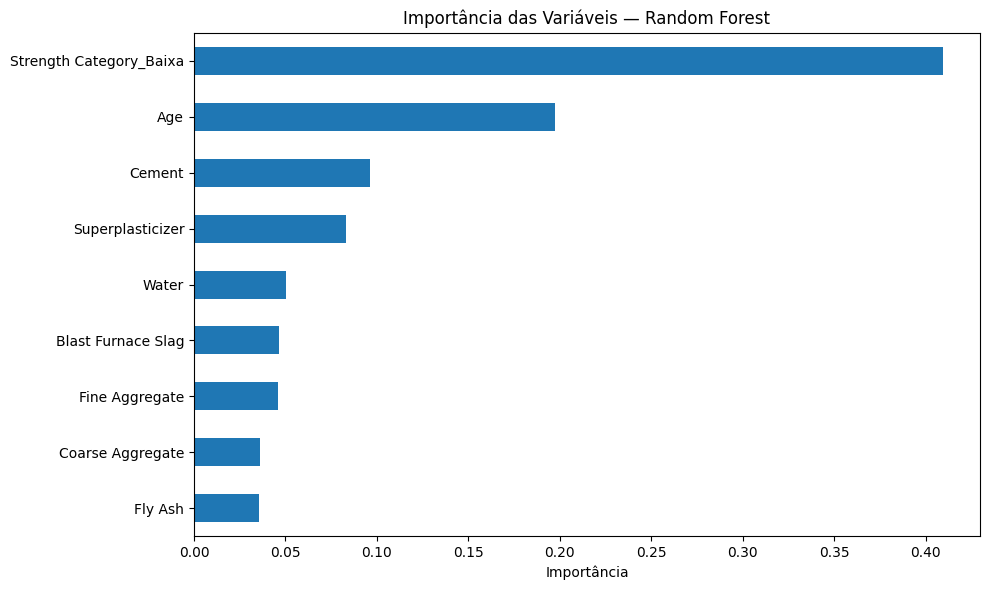

In [38]:
# Plotando gr√°fico de import√¢ncia das vari√°veis:

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title("Import√¢ncia das Vari√°veis ‚Äî Random Forest")
plt.xlabel("Import√¢ncia")
plt.tight_layout()
plt.show()

In [39]:
# Definindo os valores das vari√°veis para uma nova predi√ß√£o:

novo_dado = {
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25,
}

In [40]:
# Convertendo os novos dados de predi√ß√£o para DataFrame:

novo_df = pd.DataFrame([novo_dado])

In [41]:
# Garantindo que as colunas sejam as mesmas do X original:

for col in X.columns:
    if col not in novo_df.columns:
        novo_df[col] = 0  # Preenche com 0 vari√°veis dummies ou faltantes!

In [42]:
# Reordenando as colunas:

novo_df = novo_df[X.columns]

In [43]:
# Fazer nova previs√£o com Random Forest:

resistencia_prevista = rf_model.predict(novo_df)

# Exibindo o resultado:
print(f"Resist√™ncia prevista do concreto: {resistencia_prevista[0]:.2f} MPa")

Resist√™ncia prevista do concreto: 72.12 MPa
